### Problem Statement 1


> Last year, five randomly selected students took a math aptitude test before they began their statistics course. The Statistics Department has three questions. 

> What linear regression equation best predicts statistics performance, based on math aptitude scores? 

> If a student made an 80 on the aptitude test, what grade would we expect her to make in statistics? 

> How well does the regression equation fit the data? 

> In the table below, the xi column shows scores on the aptitude test. Similarly, the yi column shows statistics grades.  

* Student : {1, 2, 3, 4, 5}
* xi : {95, 85, 80, 70, 60}
* yi : {85, 95, 70, 65, 70}



Correlation coefficient : 0.6930525298193004
Equation found : y = 0.6438356164383562  * x + 26.78082191780822
If x = 80, output is :  78.2876712328767


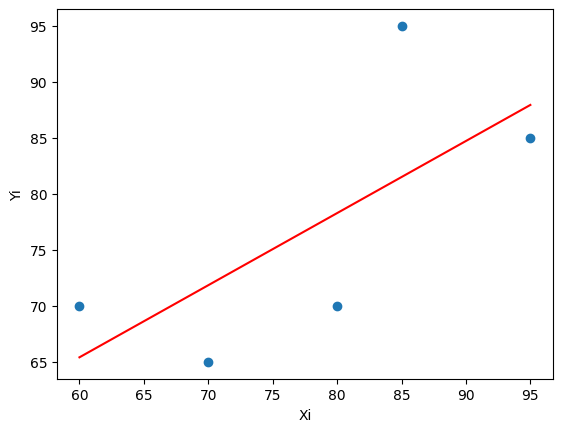

In [1]:
# Simple linear regression equation : y = mx + c, c is the y intercept,
# m is the slop / coefficient.

from math import sqrt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = [[95, 85], [85, 95], [80, 70], [70, 65], [60, 70]]

df = pd.DataFrame(data)
df

# All rows, column is either 0 or 1
x = df.iloc[:,0]
y = df.iloc[:,1]

# For estimation of slope : 
# formula : m = summation(xi - mean(x))*(yi - mean(y)) / summation(xi - mean(x))^2

mean_x = x.mean()
mean_y = y.mean()

m = ((x - mean_x) * (y - mean_y)).sum() / (((x - mean_x)**2).sum())


# For estimation of y intercept (c), we can use the simple linear regression equation : 
# y = mx + c
# c = mean_y - m * mean_x

c = mean_y - m * mean_x

# To find how well the regression line fits, correlation coefficient is found (R)
# R is in range -1 to 1, 1 -> positive correlation, -1 -> negative correlation.

# Equation for r : n(summation xy) - (summation x) * (summation y) / ....
#    (denom) : sqrt((n(summation x^2)) - summation_x ** 2) * (n * (summation y^2) - summation_y ** 2)

n = len(x)

correlation_coefficient = (n * (x * y).sum() - (x.sum() * y.sum()))
correlation_coefficient = correlation_coefficient / (sqrt((n * (x**2).sum() - (x.sum() ** 2)) * (n * (y ** 2).sum() - (y.sum() ** 2))))
print("Correlation coefficient :", correlation_coefficient)

# Plotting predicted line to see how it fits input data.
predicted_output = []
for i in range(len(x)):
    predicted_output.append(m * x[i] + c)

plt.plot(x, predicted_output, color="RED")


# Plotting the data
plt.xlabel('Xi')
plt.ylabel('Yi')
plt.scatter(x=x, y=y,   ) 

print("Equation found : y =", m, " * x +", c)

# If input is 80, output will be : 
output = m * 80 + c
print("If x = 80, output is : ", output)


### Problem Statement 2
> The sales of a company (in million dollars) for each year are shown in the table below. 
> x (year) = [2005, 2006, 2007, 2008, 2009]
> y (sales) = [12, 19, 29, 37, 45]
 
> a) Find the least square regression line y = a x + b. 
> b) Use the least squares regression line as a model to estimate the sales of the company in 2012. 

> c) How well does the regression equation fit the data? 

Correlation coefficient: 0.9988681377244376
Equation: y =  8.4  * x +  -16830.399999999998
In the year 2012, the sales would be:  70.40000000000146


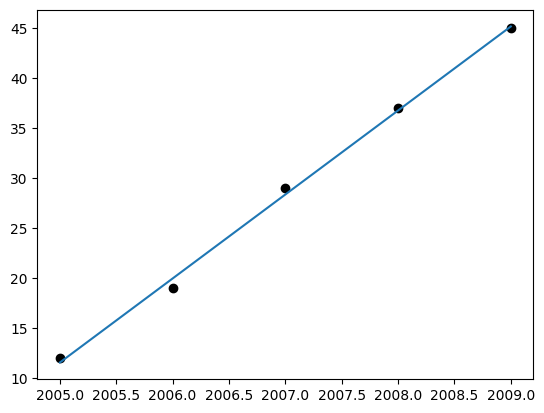

In [2]:
# For simple linear regression, we get the formula : y = mx + c
# While using the least square method, we usually represent this as y = ax + b
# First, importing the data into a panda's data frame
df = pd.DataFrame([[2005, 12], [2006, 19], [2007, 29], [2008, 37], [2009, 45]])
df

# To find the value of m, we can use the same equation as used in the previous question
# m = summation(xi - mean(xi) * (yi - mean(yi))) / summation(xi - mean(xi)**2)

x = df.iloc[:,0]
y = df.iloc[:,1]

mean_x = x.mean()
mean_y = y.mean()

m = ((x - mean_x) * (y - mean_y)).sum()
m = m / ((x - mean_x) ** 2).sum()


# For finding the intercept c, we can use the formula : 
# y = mx + c
# c = mean_y - m * mean_x
c = mean_y - m * mean_x



# To see how 'good' the approximate calculated / predicted line is, we can use the correlation coefficient.
# correlation_coefficient = n * summation(xy) - summation(x) * summation(y) / ((sqrt(n * summation(x**2) - summation(x)  ** 2) * (n * summation(y ** 2) - summation(y) ** 2)) 
n = len(x)

correlation_coefficient = n * (x * y).sum() - (x.sum() * y.sum())
correlation_coefficient = correlation_coefficient / sqrt((n * (x**2).sum() - (x.sum() ** 2)) * (n * (y ** 2).sum() - (y.sum() ** 2)))
print("Correlation coefficient:", correlation_coefficient)

print("Equation: y = ", m, " * x + ", c)
# Plotting the graph (for input data), we get : 
plt.scatter(x, y, color="BLACK")

# Find the predicted outputs.
outputs = []
for i in range(n):
    outputs.append(x[i] * m + c)

plt.plot(x, outputs)

print("In the year 2012, the sales would be: ", m*2012 + c)